## Prediction of Housing Prices: California City

We will use a Dataset which provides the Housing Prices of various areas of California City based on various parameters like:
1. Latitudes and Longitudes
2. Total Rooms and Bedrooms
3. Total Population
4. Income
5. Ocean Proximity

#### We have used a simple Linear Regression Model with appropriate visualizations and descriptions.

### Importing Libraries

In [1]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<b>Analysis</b>: The column 'total_bedrooms' have certain values as NaN.

### Data Cleaning

In [6]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(value=housing['total_bedrooms'].mean())

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Data Visualization

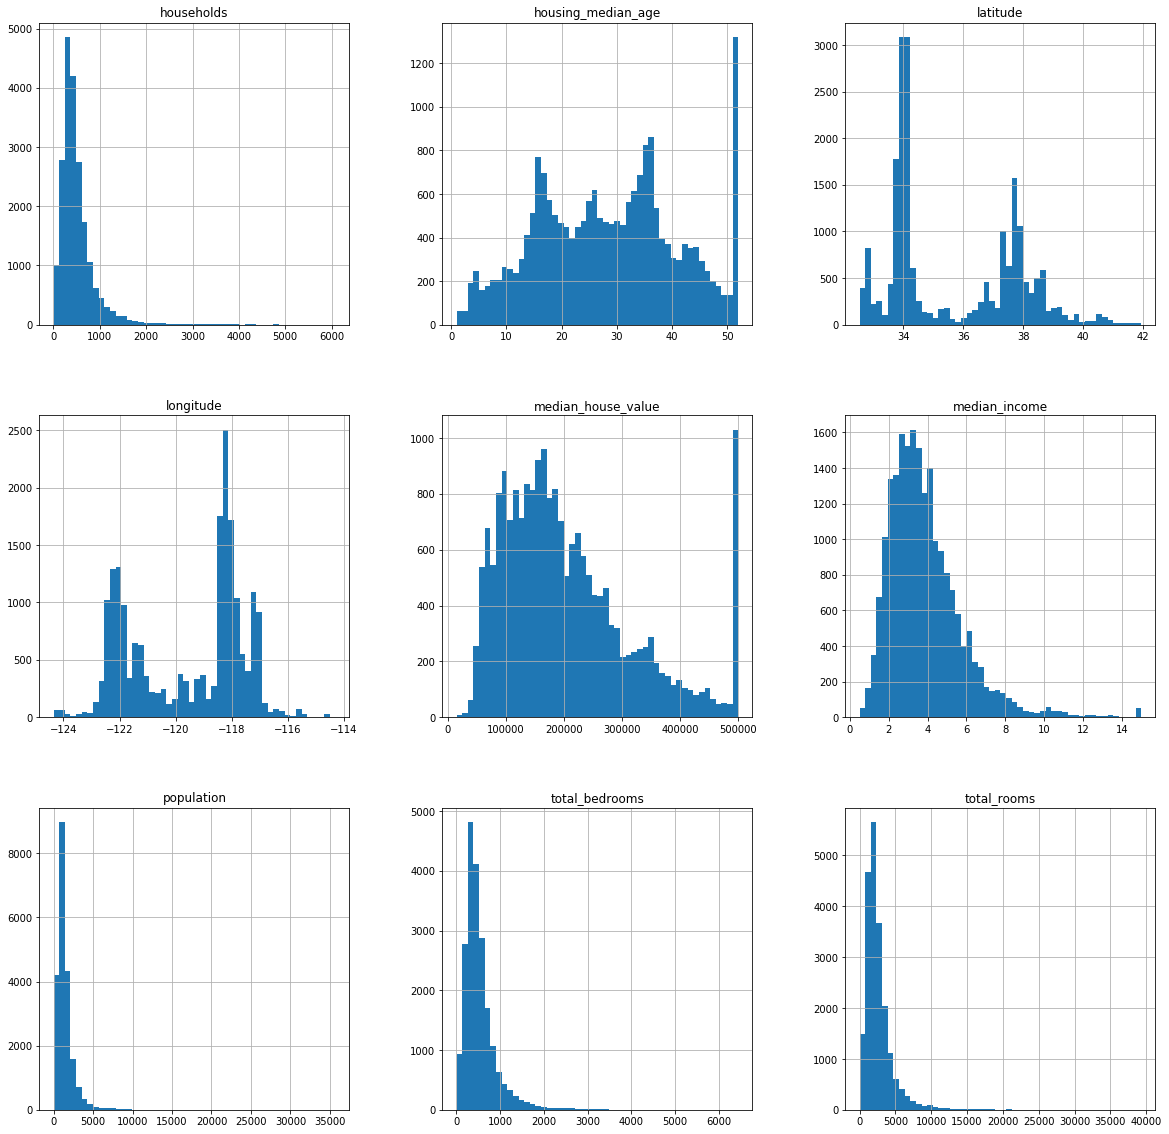

In [8]:
housing.hist(bins=50, figsize=(20,20))
plt.show()

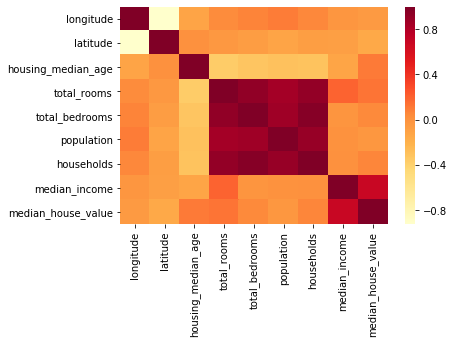

In [9]:
sns.heatmap(housing.corr(), cmap='YlOrRd')

<b>Analysis</b>: We can conclude that the Price of the House to some extent depends on the Income of the Person. Thus we need to modify the data.

### Calculating Average Rooms and Bedrooms

In [10]:
housing['avg_rooms'] = housing['total_rooms']/housing['households']

In [11]:
housing['avg_bedrooms'] = housing['total_bedrooms']/housing['households']

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081


### Calculating Population per Household

In [13]:
housing['pop_household'] = housing['population']/housing['households']

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


### Converting Ocean Proximity to Numerical Values

In [15]:
housing['NEAR BAY']=0
housing['INLAND']=0
housing['<1H OCEAN']=0
housing['ISLAND']=0
housing['NEAR OCEAN']=0

In [16]:
housing.loc[housing['ocean_proximity']=='NEAR BAY','NEAR BAY']=1
housing.loc[housing['ocean_proximity']=='INLAND','INLAND']=1
housing.loc[housing['ocean_proximity']=='<1H OCEAN','<1H OCEAN']=1
housing.loc[housing['ocean_proximity']=='ISLAND','ISLAND']=1
housing.loc[housing['ocean_proximity']=='NEAR OCEAN','NEAR OCEAN']=1

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,1,0,0,0,0


In [18]:
housing.drop(['total_rooms','total_bedrooms','households','ocean_proximity','population'], axis=1, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,avg_rooms,avg_bedrooms,pop_household,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,1.023810,2.555556,1,0,0,0,0
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.971880,2.109842,1,0,0,0,0
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,1.073446,2.802260,1,0,0,0,0
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,1.073059,2.547945,1,0,0,0,0
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,1.081081,2.181467,1,0,0,0,0


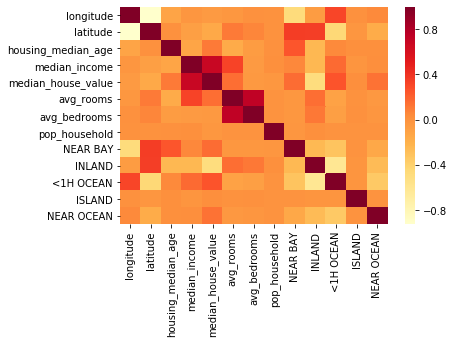

In [19]:
sns.heatmap(housing.corr(), cmap='YlOrRd')

<b>Analysis</b>: We can see that now the Price of the House are related to various factors.

### Training and Testing Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = housing.drop('median_house_value', axis=1)
Y = housing['median_house_value']

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

### Applying Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Coefficient for each Parameter

In [26]:
cdf = pd.DataFrame(lr.coef_,X_train.columns,columns=['Coeff'])

In [27]:
cdf

,Coeff
longitude,-25692.757608
latitude,-24061.572966
housing_median_age,810.409126
median_income,39553.353427
avg_rooms,-4337.440143
avg_bedrooms,27416.779772
pop_household,-321.754106
NEAR BAY,-18635.604660
INLAND,-65328.610903
<1H OCEAN,-24884.736574


### Testing the Model

In [28]:
import math

def roundup(x):
   return int(math.ceil(x / 100.0)) * 100 
predictions = list(map(roundup,lr.predict(X_test)))

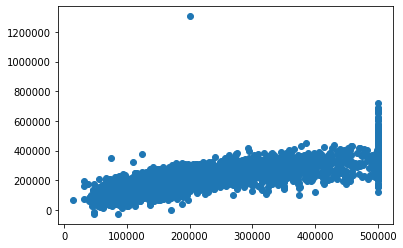

In [29]:
plt.scatter(Y_test,predictions)

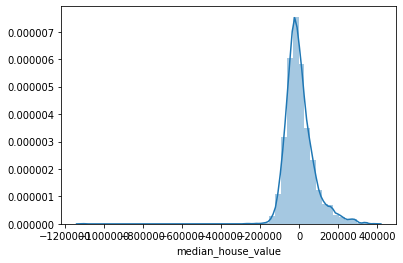

In [30]:
sns.distplot((Y_test - predictions))

<b>Analysis</b>: We can see that Predictions are normally distributed.

### Evaluating Metrics

In [31]:
from sklearn import metrics

In [32]:
mae = metrics.mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 53131.817587209305


In [33]:
mse = metrics.mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5527116899.903828


In [34]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 74344.58218258966
